In [1]:
library(tidyverse)
library(cowplot)
library(ggExtra)
library(ggbeeswarm)

`%+replace%` <- ggplot2::`%+replace%`

theme_zietzm <- function(base_size = 11.5, base_family = "") {
    # Starts with theme_bw and then modify some parts
    # Theme options are documentated at http://docs.ggplot2.org/current/theme.html
    ggplot2::theme_classic(base_size = base_size, base_family = base_family) %+replace%
    ggplot2::theme(

        strip.background  = ggplot2::element_rect(fill = NA, colour = 'grey90', size = 0),
        strip.text = element_text(vjust = 1, size = 10),
        plot.margin       = ggplot2::margin(t=2, r=2, b=2, l=2, unit='pt'),
        legend.spacing     = grid::unit(0.1, 'cm'),
        legend.key        = ggplot2::element_blank(),
        panel.border=element_rect(fill = NA, color = 'black', size = 0.5), 
        axis.line=element_line(size=0),
    )
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
metrics <- read_csv('../../data/task1/calibration/hetionet_calibration_metrics.csv')

metrics %>% head

Parsed with column specification:
cols(
  network = col_character(),
  metaedge = col_character(),
  feature = col_character(),
  cal = col_double(),
  ref = col_double(),
  brier = col_double(),
  weighted_mae = col_double(),
  auroc = col_double()
)


network,metaedge,feature,cal,ref,brier,weighted_mae,auroc
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
full,GpPW,xswap_prior,0.0001981475,0.004627288,0.004825435,0.4681769,0.8852803
full,GpPW,scaled_degree,0.0004524735,0.004578769,0.005031242,0.4934522,0.8854140
full,GpPW,analytic_prior,0.0053627953,0.004487413,0.009850209,0.4744986,0.8853931
full,GpMF,xswap_prior,0.0000680333,0.002400313,0.002468346,0.4798951,0.9186088
full,GpMF,scaled_degree,0.0001411586,0.002406778,0.002547937,0.4621553,0.9186751
full,GpMF,analytic_prior,0.0006443839,0.002386177,0.003030561,0.4338547,0.9186529


In [3]:
metrics %>%
    filter(feature == 'xswap_prior') %>%
    mutate(network = network %>% recode_factor(full = "unsampled", sampled = 'sampled', other = 'separate')) %>%
    write_tsv("../../data/5.tsv")

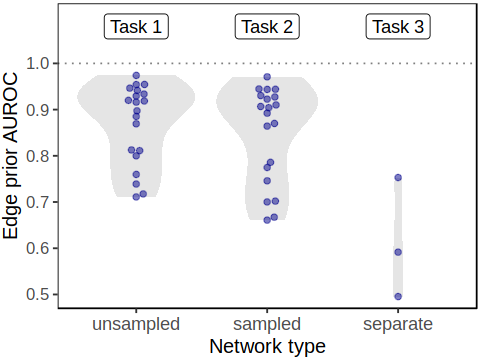

In [9]:
options(repr.plot.width=4, repr.plot.height=3)

auroc_tasks <- metrics %>%
filter(feature == 'xswap_prior') %>%
# mutate(network = network %>% factor(levels = c('full', 'sampled', 'other'))) %>%
mutate(network = network %>% recode_factor(full = "unsampled", sampled = 'sampled', other = 'separate')) %>%
ggplot(aes(x = network, y = auroc)) + 
# geom_boxplot(outlier.shape = NA) +
geom_violin(fill = 'grey90', scale = 'count', color = NA) +
geom_beeswarm(alpha = 0.5, color = 'darkblue', cex = 2.1) +
theme_zietzm() +
ylab('Edge prior AUROC') +
xlab('Network type') +
coord_cartesian(ylim = c(0.5, 1.1)) +
scale_y_continuous(breaks = c(0.5, 0.6, 0.7, 0.8, 0.9, 1.0)) +
geom_label(data = data.frame(network = c('unsampled', 'sampled', 'separate'), 
                             label = c('Task 1', 'Task 2', 'Task 3'),
                             auroc = rep(x = 1.08, times = 3)),
          aes(label = label)) +
geom_hline(yintercept = 1, linetype = 'dotted', color = 'grey50') +
theme(axis.title.x = element_text(size = 12), axis.title.y = element_text(size = 12), 
      axis.text.y = element_text(size = 10), axis.text.x = element_text(size = 11))

ggsave(filename = '../../img/auroc_dists.png', auroc_tasks, dpi = 300, width = 4, height = 3)

auroc_tasks